In [4]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import random
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from data_loader import get_merged_scores_unidirectional_df
from utils.data_dicts import all_method_names, pmd_colors_dict, patho_colors_dict, popu_freq_colors_dict

Index(['mut_id', 'md5', 'pmd_id', 'nr', 'prot_acc_version', 'snp_id',
       'mut_real', 'wt_aa_1letter', 'mt_aa_1letter', '1indexed_prot_mt_pos',
       'chrom_num', 'chrom_pos', 'ref_allele', 'alt_allele', 'function',
       'source', 'crossref', 'function_summarized', 'class', 'sift',
       'polyphen2_HVAR', 'metarnn', 'revel', 'mvp', 'cadd_raw',
       'integrated_fitCons', 'phyloP17way_primate', 'phastCons17way_primate',
       'bStatistic', 'esm1b_t33_650M_UR50S', 'esm1v_t33_650M_UR90S',
       'esm2_t33_650M_UR50D', 'prottrans_bert_bfd', 'prottrans_albert_bfd',
       'plus_rnn', 'prottrans_t5_xl_u50', 'vespa', 'vespal', 'proteinbert',
       'sequnet', 'protbert', 'unirep'],
      dtype='object')
(7179, 42)
Effect       3818
No-effect    1777
Knock-out    1584
Name: class, dtype: int64


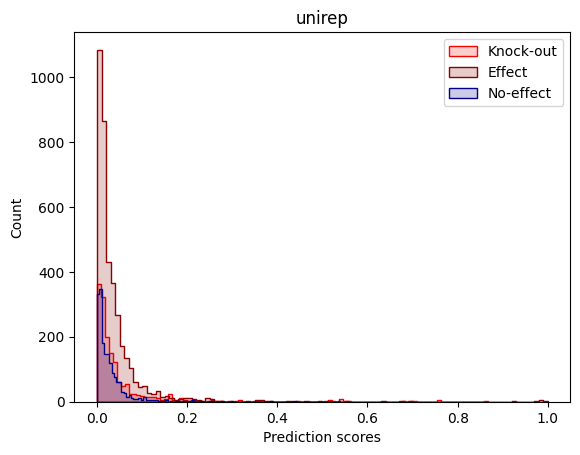

In [2]:
def plot_pmd_distribution(df, method_name):
    plt.cla()

    effect = df[df["class"]=="Effect"].copy()
    knock_out = df[df["class"]=="Knock-out"].copy()
    no_effect = df[df["class"]=="No-effect"].copy()
    # print(effect.shape, knock_out.shape, no_effect.shape)

    bins = 100 # 20, 100, 500
    
    sns.histplot(knock_out["pred"], bins=bins, label=f"Knock-out", element="step", alpha=.2, color=pmd_colors_dict["Knock-out"])
    sns.histplot(effect["pred"], bins=bins, label=f"Effect", element="step", alpha=.2, color=pmd_colors_dict["Effect"])
    sns.histplot(no_effect["pred"], bins=bins, label=f"No-effect", element="step", alpha=.2, color=pmd_colors_dict["No-effect"])
    
    plt.title(f"{method_name}")
    plt.legend()
    plt.xlabel("Prediction scores")
    plt.ylabel("Count")
    # plt.show()
    plt.savefig(home_dir+f"data/plots_scores_distribution/pmd/{method_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)

df = get_merged_scores_unidirectional_df("pmd", home_dir)
for i, method_name in enumerate(all_method_names):
    if method_name=="random_classifier": df[method_name] = [random.uniform(0, 1) for i in range(df.shape[0])]
    df["pred"] = df[method_name].copy()
    plot_pmd_distribution(df, method_name)
    # if i==1: break

Index(['clinvar_id', 'gene_name', 'gene_id', 'snp_id', 'mrna_acc_version',
       'mrna_gi', 'prot_variant', 'prot_acc_version', '1indexed_prot_mt_pos',
       'wt_aa', 'mt_aa', 'wt_aa_1letter', 'mt_aa_1letter', 'chrom_variant',
       'chrom_acc_version', 'chrom_num', 'chrom_pos', 'ref_allele',
       'alt_allele', 'class', 'metarnn', 'mvp', 'sift', 'polyphen2_HVAR',
       'cadd_raw', 'revel', 'integrated_fitCons', 'phyloP17way_primate',
       'phastCons17way_primate', 'bStatistic', 'esm1b_t33_650M_UR50S',
       'esm1v_t33_650M_UR90S', 'esm2_t33_650M_UR50D', 'prottrans_bert_bfd',
       'prottrans_albert_bfd', 'plus_rnn', 'prottrans_t5_xl_u50', 'mut_real',
       'vespa', 'vespal', 'proteinbert', 'sequnet', 'protbert', 'unirep'],
      dtype='object')
(12263, 44)
Likely-pathogenic    4804
Rare                 3073
Pathogenic           2499
Common               1887
Name: class, dtype: int64


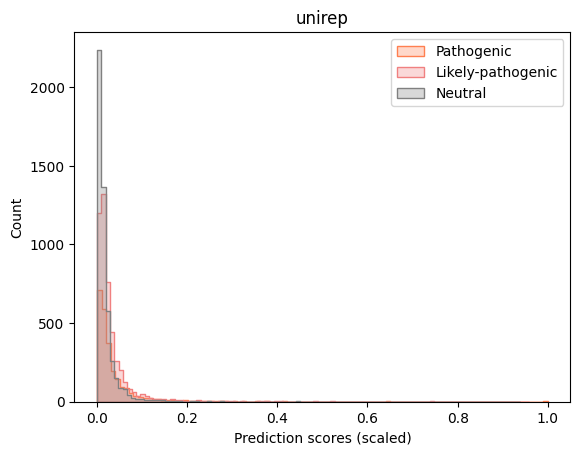

In [6]:
def plot_patho_distribution(df, method_name):
    plt.cla()

    patho = df[df["class"]=="Pathogenic"]
    likelypatho = df[df["class"]=="Likely-pathogenic"]
    neutral = df[(df["class"]!="Pathogenic") & (df["class"]!="Likely-pathogenic")]
    # print(patho.shape, likelypatho.shape, neutral.shape)

    bins = 100 # 20, 100, 500
    
    sns.histplot(patho["pred"], bins=bins, label=f"Pathogenic", element="step", alpha=.3, color=patho_colors_dict["Pathogenic"])
    sns.histplot(likelypatho["pred"], bins=bins, label=f"Likely-pathogenic", element="step", alpha=.3, color=patho_colors_dict["Likely-pathogenic"])
    sns.histplot(neutral["pred"], bins=bins, label=f"Neutral", element="step", alpha=.3, color=patho_colors_dict["Neutral"])
    
    plt.title(f"{method_name}")
    plt.legend()
    plt.xlabel("Prediction scores (scaled)")
    plt.ylabel("Count")
    # plt.show()
    plt.savefig(home_dir+f"data/plots_scores_distribution/patho/{method_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)

df = get_merged_scores_unidirectional_df("patho", home_dir)
for i, method_name in enumerate(all_method_names):
    if method_name=="random_classifier": df[method_name] = [random.uniform(0, 1) for i in range(df.shape[0])]
    df["pred"] = df[method_name].copy()
    plot_patho_distribution(df, method_name)
    # if i==1: break

Index(['snp_id', 'gene_name', 'mane_refseq_prot', 'mane_refseq_nuc',
       'mane_status', 'chrom_acc_version', 'chrom_num', 'source_ref_allele',
       'source_alt_alleles', 'alfa_chrom_pos', 'alfa_ref_allele',
       'alfa_alt_allele', 'alfa_alt_alleles', 'prot_variant',
       'prot_acc_version', '1indexed_prot_mt_pos', 'wt_aa', 'mt_aa',
       'wt_aa_1letter', 'mt_aa_1letter', 'wt_population', 'mt_population',
       'wt_freq', 'mt_freq', 'class', 'metarnn', 'mvp', 'sift',
       'polyphen2_HVAR', 'cadd_raw', 'revel', 'integrated_fitCons',
       'phyloP17way_primate', 'phastCons17way_primate', 'bStatistic',
       'n_methods_having_preds', 'is_selected_prev', 'esm1b_t33_650M_UR50S',
       'esm1v_t33_650M_UR90S', 'esm2_t33_650M_UR50D', 'prottrans_bert_bfd',
       'prottrans_albert_bfd', 'plus_rnn', 'prottrans_t5_xl_u50', 'mut_real',
       'vespa', 'vespal', 'proteinbert', 'sequnet', 'protbert', 'unirep'],
      dtype='object')
(35082, 51)
Common        9142
Ultra-rare    9124
Si

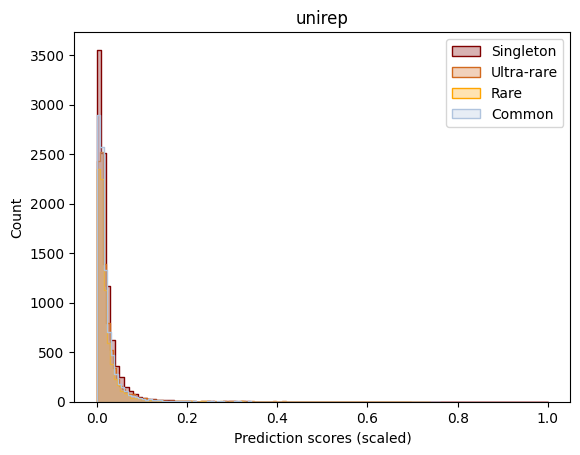

In [8]:
def plot_popu_freq_distribution(df, method_name):
    plt.cla()

    common = df[df["class"]=="Common"]
    rare = df[df["class"]=="Rare"]
    ultra_rare = df[df["class"]=="Ultra-rare"]
    singleton = df[df["class"]=="Singleton"]

    # print(effect.shape, knock_out.shape, no_effect.shape)
    bins = 100 # 20, 100, 500
    
    sns.histplot(singleton["pred"], bins=bins, label=f"Singleton", element="step", alpha=.3, color=popu_freq_colors_dict["Singleton"])
    sns.histplot(ultra_rare["pred"], bins=bins, label=f"Ultra-rare", element="step", alpha=.3, color=popu_freq_colors_dict["Ultra-rare"])
    sns.histplot(rare["pred"], bins=bins, label=f"Rare", element="step", alpha=.3, color=popu_freq_colors_dict["Rare"])
    sns.histplot(common["pred"], bins=bins, label=f"Common", element="step", alpha=.3, color=popu_freq_colors_dict["Common"])
    
    plt.title(f"{method_name}")
    plt.legend()
    plt.xlabel("Prediction scores (scaled)")
    plt.ylabel("Count")
    # plt.show()
    plt.savefig(home_dir+f"data/plots_scores_distribution/popu_freq/{method_name}.png", dpi=300, format="png", bbox_inches='tight', pad_inches=0.0)

df = get_merged_scores_unidirectional_df("popu_freq", home_dir)
for i, method_name in enumerate(all_method_names):
    # method_name = "esm1b_t33_650M_UR50S"
    if method_name=="random_classifier": df[method_name] = [random.uniform(0, 1) for i in range(df.shape[0])]
    df["pred"] = df[method_name].copy()
    plot_popu_freq_distribution(df, method_name)
    # break